In [19]:
#resolve a classifier problem using perceptron
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random 

In [2]:
#features
X = pd.DataFrame([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
#target
y = pd.Series([0,0,0,0,1,1,1,1])

In [3]:
df = X.copy()
df['target'] = y
df

,0,1,target
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1
5,2,2,1
6,3,2,1
7,2,3,1


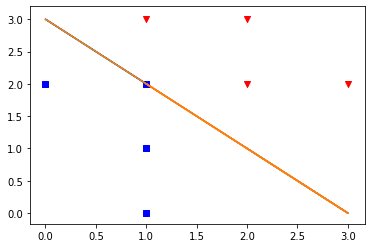

In [4]:
x, _y, target = zip(*df.values)
markers = list(map(lambda x: 'v' if x == 1 else 's', target))
for ix, iy, m in zip(x, _y, markers):
    plt.scatter(ix, iy, marker = m, c = 'red' if m == 'v' else 'blue')

z = 3 - X
plt.plot(X, z)

In [5]:
def score(features, weights, bias):
    return features.dot(weights) + bias

In [6]:
def prediction(features, weights, bias):
    return features.dot(weights) + bias#return 1 / (1 + math.exp(-x))

In [7]:
def error(features, weights, bias, label):
    pred = score(features, weights, bias)
    if pred == label:
        return 0
    else:
        return np.abs(score(features, weights, bias))

In [8]:
# z = wx + bias = w1x1 + w2x2 + bias
def total_error(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += error(X.loc[i], weights, bias, y[i])
    return total_error

In [9]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(features, weights, bias)
    if pred == label:
        return weights, bias
    else:
        if pred == 1 and label == 0:
            for i in range(len(weights)):
                weights[i] += learning_rate*features[i]
                bias += learning_rate
        elif pred == 0 and label == 1:
            for i in range(len(weights)):
                weights[i] -= learning_rate*features[i]
                bias -= learning_rate
    return weights, bias

In [10]:
def perceptron_clever(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(features, weights, bias)
    for i in range(len(weights)):
        weights[i] += (label - pred)*features[i]*learning_rate
        bias += (label - pred)* learning_rate
    return weights, bias

In [22]:
def perceptron_algorithm(X, y, learning_rate = 0.01, epochs = 4):
    weights = [1.0 for i in range(len(X.iloc[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_error(weights, bias, X, y))
        j = random.randint(0, len(X) - 1)
        weights, bias = perceptron_clever(weights, bias, X.loc[0], y.loc[0])
    return weights, bias, errors

In [23]:
perceptron_algorithm(X, y)

([0.96176427, 1.0], -0.07647146, [26.0, 25.73, 25.4681, 25.214056999999997])